# Intro
Notebook to download [Hotels-50K dataset](https://github.com/GWUvision/Hotels-50K) images based on the [download_train.py](https://github.com/GWUvision/Hotels-50K/blob/master/download_train.py) script.

### Disclaimer: We are currently not sure if using external datasets is allowed in this competition!
You can see [Use of External Data Sets](https://www.kaggle.com/competitions/hotel-id-to-combat-human-trafficking-2022-fgvc9/discussion/317922) discussion for details. The competition host did not confirm whether we can use external data yet.

# Download dataset with image info from github repo

In [1]:
!mkdir hotels-50k
!wget -P hotels-50k https://github.com/GWUvision/Hotels-50K/raw/master/input/dataset.tar.gz
!tar -xvzf hotels-50k/dataset.tar.gz -C hotels-50k
!rm hotels-50k/dataset.tar.gz

--2023-09-06 12:32:33--  https://github.com/GWUvision/Hotels-50K/raw/master/input/dataset.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GWUvision/Hotels-50K/master/input/dataset.tar.gz [following]
--2023-09-06 12:32:33--  https://raw.githubusercontent.com/GWUvision/Hotels-50K/master/input/dataset.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14353865 (14M) [application/octet-stream]
Saving to: ‘hotels-50k/dataset.tar.gz’

dataset.tar.gz      100%[===================>]  13.69M  --.-KB/s    in 0.05s   

2023-09-06 12:32:33 (288 MB/s) - ‘hotels-50k/dataset.tar.gz’ saved [14353865/

# Load data info

In [2]:
import pandas as pd
import tqdm

In [3]:
chain_df = pd.read_csv("./hotels-50k/dataset/chain_info.csv")
display(chain_df.head())

,chain_id,chain_name
0,-1,unknown
1,0,Best Western
2,1,Hyatt
3,2,Marriott
4,3,Hilton


In [4]:
hotel_df = pd.read_csv("./hotels-50k/dataset/hotel_info.csv")
display(hotel_df.head())

,hotel_id,hotel_name,chain_id,latitude,longitude
0,391,Extended Stay America - Fairbanks - Old Airpor...,72,64.83538,-147.82330
1,392,Hilton Hangzhou Qiandao Lake Resort,3,29.60819,119.07290
2,393,Taj Lands End,-1,19.04391,72.81879
3,395,Cambridge Suites Hotel Sydney,-1,46.13663,-60.19551
4,396,Tamanu Beach,14,-18.84213,-159.78794


In [5]:
train_df = pd.read_csv('./hotels-50k/dataset/train_set.csv', header=None,
                       names=['image_id', 'hotel_id', 'url', 'source', 'timestamp'])

display(train_df.head())

,image_id,hotel_id,url,source,timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


# Check Hotels-50k data

In [6]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
data_df = train_df.merge(hotel_df, on="hotel_id").merge(chain_df, on="chain_id")
data_df["image_id"] = data_df["image_id"].astype(str)
data_df["hotel_id"] = data_df["hotel_id"].astype(str)
data_df["chain_id"] = data_df["chain_id"].astype(str)

display(data_df.head())

,image_id,hotel_id,url,source,timestamp,hotel_name,chain_id,latitude,longitude,chain_name
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
2,2599229,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
3,2599231,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,Hilton Minneapolis,3,44.97338,-93.27331,Hilton
4,2599232,18187,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 21:27,Hilton Minneapolis,3,44.97338,-93.27331,Hilton


### Dataset size

In [8]:
print("Image count:", len(data_df))
print("Hotel count:", len(data_df["hotel_id"].unique()))
print("Chain count:", len(data_df["chain_id"].unique()))

Image count: 1124215
Hotel count: 50000
Chain count: 93


### Hotel and image count per chain

In [9]:
chain_group_df = data_df.groupby(["chain_name"]).agg({"hotel_id": [pd.Series.nunique], "image_id" : [pd.Series.nunique]})
chain_group_df.columns = ["_".join(x) for x in chain_group_df.columns.ravel()]
chain_group_df = chain_group_df.reset_index().sort_values("hotel_id_nunique")[::-1]

<ipython-input-9-fdc01e99c45a>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  chain_group_df.columns = ["_".join(x) for x in chain_group_df.columns.ravel()]


In [10]:
fig = px.scatter(chain_group_df, x="chain_name", y="hotel_id_nunique",
                 size="image_id_nunique", color = "image_id_nunique",
                 hover_name = None,
                 log_y=True, size_max=75)

fig.update_yaxes(title_text="Hotel count")
fig.update_xaxes(title_text="Chain ID")
fig.update_layout(title="Hotel and image count per chain", coloraxis=dict(colorbar=dict(title="Image count")))
fig.update_traces(hovertemplate="Chain: %{x} <br>Hotel count: %{y:%d}<br>Image count: %{marker.size:%d}")
fig.show()

### Image count per hotel

In [11]:
group_df = data_df.groupby(["hotel_id"]).size().to_frame("image_count").sort_values("image_count")[::-1].reset_index()

In [12]:
fig = px.histogram(group_df, x="image_count", nbins=100, marginal="box", height=500)
fig.update_layout(title="Distribution of image count per hotel")
fig.update_traces(hovertemplate="Image count: %{x} <br>Hotel count: %{y:%d}")
fig.update_yaxes(title_text="Hotel count")
fig.update_xaxes(title_text="Image count")
fig.show()

### Image count per source
Images come from two different sources: travel_website and traffickcam

In [13]:
group_df = data_df.groupby(["source"]).size().to_frame("image_count").sort_values("image_count")[::-1].reset_index()

fig = px.bar(group_df, x="source", y="image_count", height=500)
fig.update_layout(title="Image count per source")
fig.update_traces(hovertemplate="Source: %{x:%d} <br>Image count: %{y:%d}")
fig.update_yaxes(title_text="Image count")
fig.update_xaxes(title_text="Source")
fig.show()

# Sample 50 hotels with more than 10 and less than 100 images

In [14]:
hotel_group_df = data_df.groupby(by=["hotel_id"])["image_id"].count().to_frame("image_count")

In [15]:
sample_hotels = hotel_group_df[(hotel_group_df["image_count"] > 10) & (hotel_group_df["image_count"] < 100)]
print("Number of hotels with more than 10 images and less than 100:", len(sample_hotels))
sample_hotels = sample_hotels.sample(50, random_state=42)

Number of hotels with more than 10 images and less than 100: 42629


In [16]:
sample_df = data_df[data_df["hotel_id"].isin(sample_hotels.index)].reset_index(drop=True)
print("Sampled images:", len(sample_df))

Sampled images: 1218


In [17]:
chain_group_df = sample_df.groupby(["chain_name"]).agg({"hotel_id": [pd.Series.nunique], "image_id" : [pd.Series.nunique]})
chain_group_df.columns = ["_".join(x) for x in chain_group_df.columns.ravel()]
chain_group_df = chain_group_df.reset_index().sort_values("hotel_id_nunique")[::-1]

fig = px.scatter(chain_group_df, x="chain_name", y="hotel_id_nunique",
                 size="image_id_nunique", color = "image_id_nunique",
                 hover_name = None,
                 size_max=75)

fig.update_yaxes(title_text="Hotel count")
fig.update_xaxes(title_text="Chain ID")
fig.update_layout(title="Sampled data <br>Hotel and image count per chain", coloraxis=dict(colorbar=dict(title="Image count")))
fig.update_traces(hovertemplate="Chain: %{x} <br>Hotel count: %{y:%d}<br>Image count: %{marker.size:%d}")
fig.show()

<ipython-input-17-f64491f1fc2b>:2: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



# Download sampled images

## Prepare to download images
The SSL certificate of the image urls is expired so we have to handle it.

In [18]:
from __future__ import print_function
import csv, multiprocessing, cv2, os
import numpy as np
import urllib
import urllib.request

import ssl

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [19]:
output_folder = "hotels-50k/images"
output_image_folder  = output_folder + "/train"

os.makedirs(output_image_folder)

## Download images

We will download the images without padding or resizing and we will keep the original folder structure: hotels-50k/images/train/chain_id/hotel_id/source/image_id.jpeg

In [20]:
def url_to_image(url):
    resp = urllib.request.urlopen(url, context=ctx)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
    return image


def download_images(imList):
    # 2d list, rows are samples
    # columns: "chain_id", "hotel_id", "source", "image_id", "url"
    for im in imList:
        try:
            saveDir = os.path.join(output_image_folder, im[0], im[1], im[2])
            if not os.path.exists(saveDir):
                os.makedirs(saveDir)

            savePath = os.path.join(saveDir, str(im[3])+'.'+im[4].split('.')[-1])

            if not os.path.isfile(savePath):
                img = url_to_image(im[4])
                cv2.imwrite(savePath,img)
            else:
                print('Already exists: ' + savePath)
        except Exception as e:
            print(e, ': ' + im[4])

In [21]:
%%time

image_data_array = sample_df[["chain_id", "hotel_id", "source", "image_id", "url"]].values

pool = multiprocessing.Pool()
NUM_THREADS = multiprocessing.cpu_count()
for cpu in range(NUM_THREADS):
    pool.apply_async(download_images,[image_data_array[cpu::NUM_THREADS]])

pool.close()
pool.join()

HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/c352433e_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/ef7f7c69_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/19208845_b.jpg
HTTP Error 404: Not Found 
: https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/50957b30_b.jpgHTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/a3611487_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/629493e2_b.jpg
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/93e4ffae_b.jpg
HTTP Error 404: Not Found: https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/ec67a485_b.jpg 
HTTP Error 404: Not Found : https://i.travelapi.com/hotels/2000000/1600000/1593900/1593828/cd0f84fd_b.jpg
HTTP Error 404: Not Found : https://i.travelap

Not every image is available, lets check how many images were successfully downloaded

In [22]:
!find {output_image_folder} -type f | wc -l

866


## Check downloaded data

In [23]:
# update the sample data frame with path, image name and whether it was downloaded
sample_df["downloaded"] = False
sample_df["image_name"] = None
sample_df["image_folder"] = None

for index, row in sample_df.iterrows():
    image_folder = os.path.join(output_image_folder, row["chain_id"], row["hotel_id"], row["source"])
    image_name   = row["image_id"] + '.'+ row["url"].split('.')[-1]
    image_path   = os.path.join(image_folder, image_name)
    if os.path.exists(image_path):
        sample_df.loc[index, "downloaded"] = True
        sample_df.loc[index, "image_name"] = image_name
        sample_df.loc[index, "image_folder"] = image_folder

In [24]:
display(sample_df.head())

,image_id,hotel_id,url,source,timestamp,hotel_name,chain_id,latitude,longitude,chain_name,downloaded,image_name,image_folder
0,2650356,24308,https://traffickcam.com/images/2017/10/2016091...,traffickcam,9/14/16 0:46,AC Hotel by Marriott New Orleans Bourbon/Frenc...,2,29.95204,-90.07122,Marriott,True,2650356.jpg,hotels-50k/images/train/2/24308/traffickcam
1,2650357,24308,https://traffickcam.com/images/2017/10/2016091...,traffickcam,9/14/16 0:46,AC Hotel by Marriott New Orleans Bourbon/Frenc...,2,29.95204,-90.07122,Marriott,True,2650357.jpg,hotels-50k/images/train/2/24308/traffickcam
2,2650358,24308,https://traffickcam.com/images/2017/10/2016091...,traffickcam,9/14/16 0:46,AC Hotel by Marriott New Orleans Bourbon/Frenc...,2,29.95204,-90.07122,Marriott,True,2650358.jpg,hotels-50k/images/train/2/24308/traffickcam
3,6525313,24308,https://i.travelapi.com/hotels/1000000/800000/...,travel_website,2019-12-19 07:17:45,AC Hotel by Marriott New Orleans Bourbon/Frenc...,2,29.95204,-90.07122,Marriott,True,6525313.jpg,hotels-50k/images/train/2/24308/travel_website
4,6525314,24308,https://i.travelapi.com/hotels/1000000/800000/...,travel_website,2019-12-19 07:17:45,AC Hotel by Marriott New Orleans Bourbon/Frenc...,2,29.95204,-90.07122,Marriott,True,6525314.jpg,hotels-50k/images/train/2/24308/travel_website


In [25]:
# number of downloaded images should be the same as number of images in the output_image_folder
print("Number of downloaded images:", sample_df["downloaded"].sum())

Number of downloaded images: 866


In [26]:
# save sample df to csv
sample_df.to_csv("hotels-50k/sample.csv", index=False)

## Display some images

In [27]:
from matplotlib import pyplot as plt

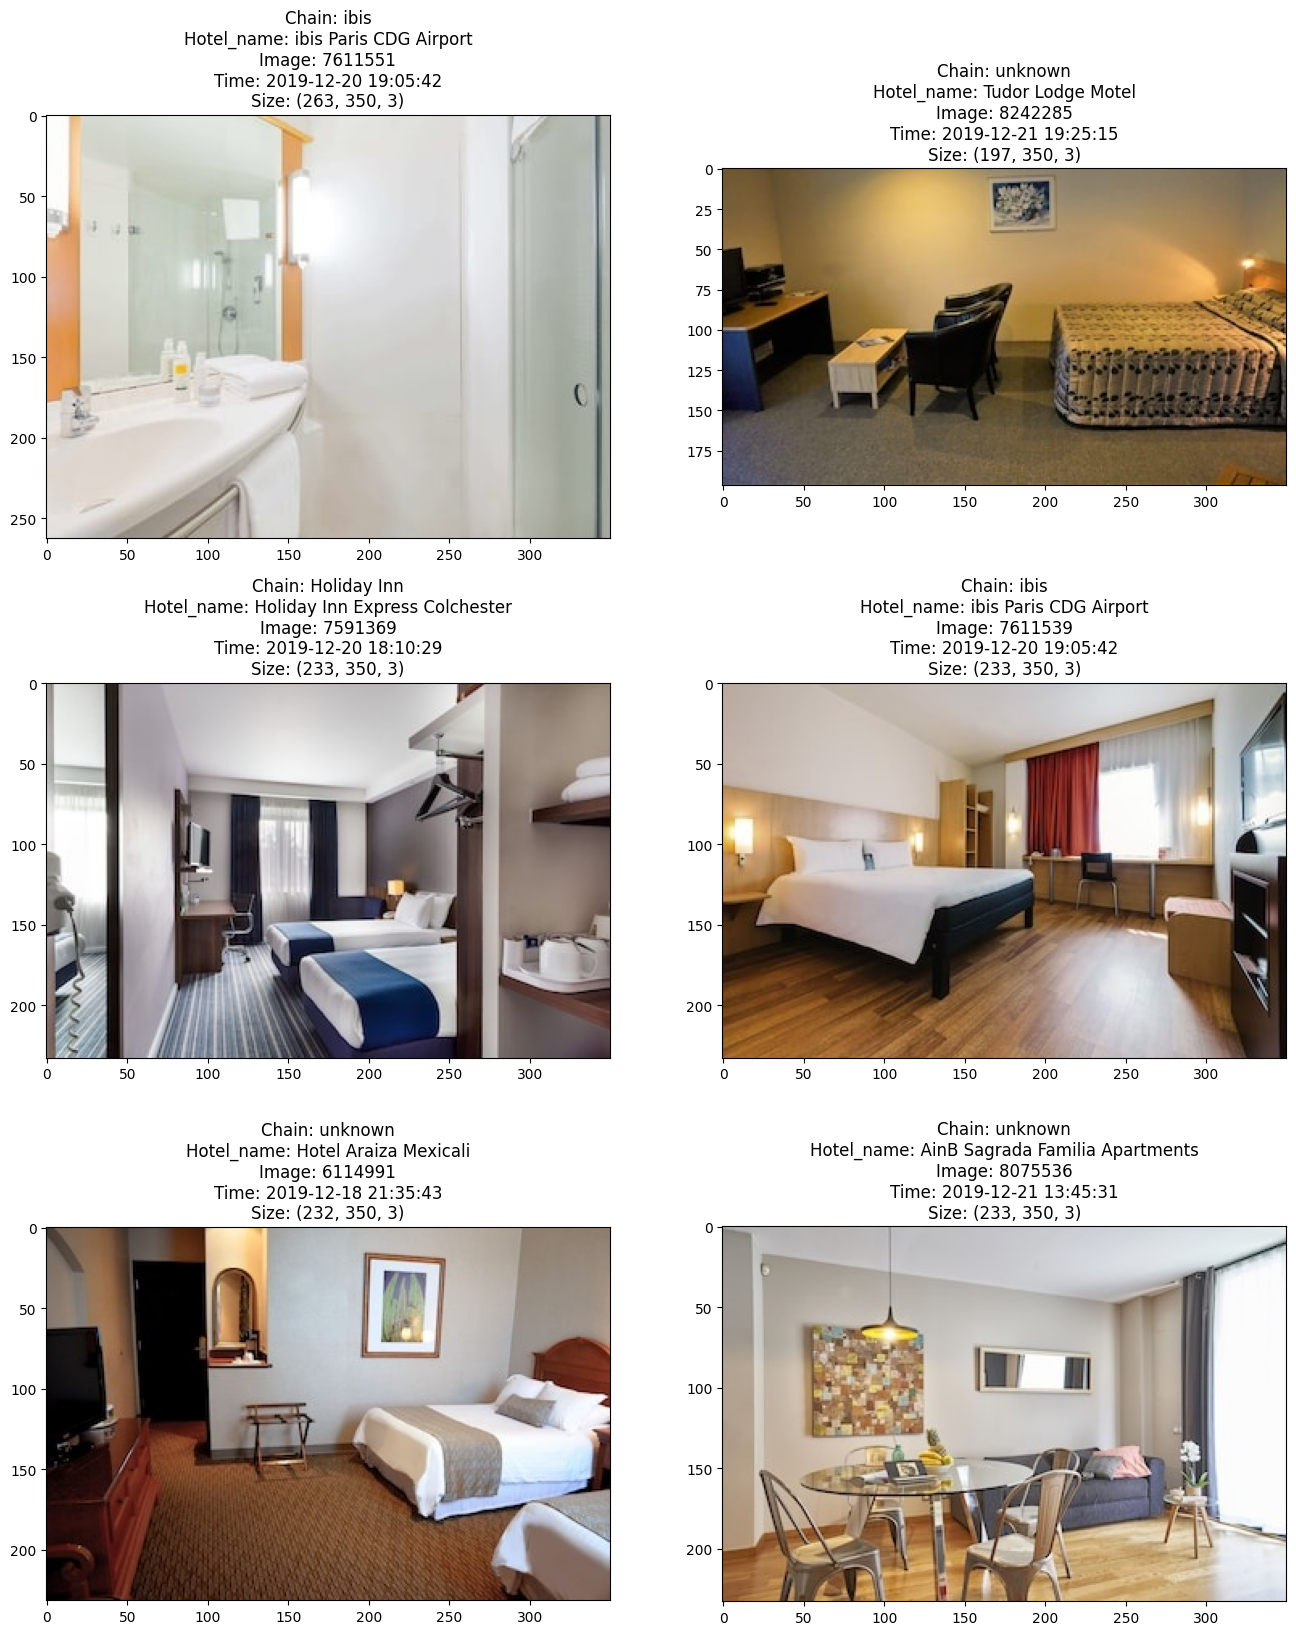

In [28]:
downloaded_df = sample_df[sample_df["downloaded"]].sample(6, random_state=42)

fig, axes = plt.subplots(3,2, figsize=(16,20))
axes = axes.ravel()

for i in range(6):
    sample = downloaded_df.iloc[i]
    img = cv2.imread(os.path.join(sample["image_folder"], sample["image_name"]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(f"Chain: {sample.chain_name}\n" +
                     f"Hotel_name: {sample.hotel_name}\n"
                     f"Image: {sample.image_id}\n" +
                     f"Time: {sample.timestamp}\n" +
                     f"Size: {np.shape(img)}")

# Create zip and clean up
Compress the downloaded images to zip file and delete the data.

In [29]:
!zip -r -qq hotels-50K-sample.zip hotels-50k
!rm -rf hotels-50k